In [2]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mpl_toolkits
#import basemap
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import os
from collections import Counter
from scipy import stats


import xarray as xr
from IPython.display import display
import time as time

In [8]:
start = time.time()
ds = xr.open_dataset("Data/Sample_wind_data/2021sample10m.grib", engine="cfgrib")
end = time.time()
print(end-start)

0.10544800758361816


In [125]:
#printing the keys and names
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"]))

u10, 10 metre U wind component, m s**-1
v10, 10 metre V wind component, m s**-1


In [126]:
#full metadata
print(ds["u10"])

<xarray.DataArray 'u10' (time: 1460, latitude: 55, longitude: 79)>
[6343700 values with dtype=float32]
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-12-31T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 62.5 62.25 62.0 61.75 ... 49.5 49.25 49.0
  * longitude   (longitude) float64 -12.5 -12.25 -12.0 -11.75 ... 6.5 6.75 7.0
    valid_time  (time) datetime64[ns] ...
Attributes:
    GRIB_paramId:                             165
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      4345
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  79
    GRIB_Ny:                                  55
  

In [127]:
ds = ds.get(["u10", "v10"])

In [128]:
df = ds.to_dataframe()

## Plot map of Wind Speed magnitude

In [129]:
df.keys()

Index(['u10', 'v10', 'number', 'step', 'surface', 'valid_time'], dtype='object')

In [130]:
display(df["u10"])


time                 latitude  longitude
2021-01-01 00:00:00  62.5      -12.50      -1.157654
                               -12.25      -0.842224
                               -12.00      -0.417419
                               -11.75       0.057190
                               -11.50       0.681213
                                              ...   
2021-12-31 18:00:00  49.0       6.00        3.061890
                                6.25        2.898804
                                6.50        3.236694
                                6.75        3.653687
                                7.00        4.077515
Name: u10, Length: 6343700, dtype: float32

In [131]:
print(df['valid_time'])

time                 latitude  longitude
2021-01-01 00:00:00  62.5      -12.50      2021-01-01 00:00:00
                               -12.25      2021-01-01 00:00:00
                               -12.00      2021-01-01 00:00:00
                               -11.75      2021-01-01 00:00:00
                               -11.50      2021-01-01 00:00:00
                                                   ...        
2021-12-31 18:00:00  49.0       6.00       2021-12-31 18:00:00
                                6.25       2021-12-31 18:00:00
                                6.50       2021-12-31 18:00:00
                                6.75       2021-12-31 18:00:00
                                7.00       2021-12-31 18:00:00
Name: valid_time, Length: 6343700, dtype: datetime64[ns]


In [132]:
display(df["v10"])

time                 latitude  longitude
2021-01-01 00:00:00  62.5      -12.50      -2.076096
                               -12.25      -2.958908
                               -12.00      -3.959885
                               -11.75      -4.913010
                               -11.50      -5.722580
                                              ...   
2021-12-31 18:00:00  49.0       6.00        2.607712
                                6.25        2.687790
                                6.50        2.802048
                                6.75        2.941696
                                7.00        2.843063
Name: v10, Length: 6343700, dtype: float32

In [133]:
display(df)

u10       v10  number   step  \
time                latitude longitude                                      
2021-01-01 00:00:00 62.5     -12.50    -1.157654 -2.076096       0 0 days   
                             -12.25    -0.842224 -2.958908       0 0 days   
                             -12.00    -0.417419 -3.959885       0 0 days   
                             -11.75     0.057190 -4.913010       0 0 days   
                             -11.50     0.681213 -5.722580       0 0 days   
...                                          ...       ...     ...    ...   
2021-12-31 18:00:00 49.0      6.00      3.061890  2.607712       0 0 days   
                              6.25      2.898804  2.687790       0 0 days   
                              6.50      3.236694  2.802048       0 0 days   
                              6.75      3.653687  2.941696       0 0 days   
                              7.00      4.077515  2.843063       0 0 days   

                                        surface          valid_time  
time                latitude longitude                               
2021-01-01 00:00:00 62.5     -12.50         0.0 2021-01-01 00:00:00  
                             -12.25         0.0 2021-01-01 00:00:00  
                             -12.00         0.0 2021-01-01 00:00:00  
                             -11.75         0.0 2021-01-01 00:00:00  
                             -11.50         0.0 2021-01-01 00:00:00  
...                                         ...                 ...  
2021-12-31 18:00:00 49.0      6.00          0.0 2021-12-31 18:00:00  
                              6.25          0.0 2021-12-31 18:00:00  
                              6.50          0.0 2021-12-31 18:00:00  
                              6.75          0.0 2021-12-31 18:00:00  
                              7.00          0.0 2021-12-31 18:00:00  

[6343700 rows x 6 columns]

In [134]:
del df['surface']

In [135]:
display(df)

u10       v10  number   step  \
time                latitude longitude                                      
2021-01-01 00:00:00 62.5     -12.50    -1.157654 -2.076096       0 0 days   
                             -12.25    -0.842224 -2.958908       0 0 days   
                             -12.00    -0.417419 -3.959885       0 0 days   
                             -11.75     0.057190 -4.913010       0 0 days   
                             -11.50     0.681213 -5.722580       0 0 days   
...                                          ...       ...     ...    ...   
2021-12-31 18:00:00 49.0      6.00      3.061890  2.607712       0 0 days   
                              6.25      2.898804  2.687790       0 0 days   
                              6.50      3.236694  2.802048       0 0 days   
                              6.75      3.653687  2.941696       0 0 days   
                              7.00      4.077515  2.843063       0 0 days   

                                                valid_time  
time                latitude longitude                      
2021-01-01 00:00:00 62.5     -12.50    2021-01-01 00:00:00  
                             -12.25    2021-01-01 00:00:00  
                             -12.00    2021-01-01 00:00:00  
                             -11.75    2021-01-01 00:00:00  
                             -11.50    2021-01-01 00:00:00  
...                                                    ...  
2021-12-31 18:00:00 49.0      6.00     2021-12-31 18:00:00  
                              6.25     2021-12-31 18:00:00  
                              6.50     2021-12-31 18:00:00  
                              6.75     2021-12-31 18:00:00  
                              7.00     2021-12-31 18:00:00  

[6343700 rows x 5 columns]

In [136]:
df['wind_mag'] = np.sqrt(df['u10']**2 + df['v10']**2)

In [137]:
display(df)

u10       v10  number   step  \
time                latitude longitude                                      
2021-01-01 00:00:00 62.5     -12.50    -1.157654 -2.076096       0 0 days   
                             -12.25    -0.842224 -2.958908       0 0 days   
                             -12.00    -0.417419 -3.959885       0 0 days   
                             -11.75     0.057190 -4.913010       0 0 days   
                             -11.50     0.681213 -5.722580       0 0 days   
...                                          ...       ...     ...    ...   
2021-12-31 18:00:00 49.0      6.00      3.061890  2.607712       0 0 days   
                              6.25      2.898804  2.687790       0 0 days   
                              6.50      3.236694  2.802048       0 0 days   
                              6.75      3.653687  2.941696       0 0 days   
                              7.00      4.077515  2.843063       0 0 days   

                                                valid_time  wind_mag  
time                latitude longitude                                
2021-01-01 00:00:00 62.5     -12.50    2021-01-01 00:00:00  2.377043  
                             -12.25    2021-01-01 00:00:00  3.076439  
                             -12.00    2021-01-01 00:00:00  3.981824  
                             -11.75    2021-01-01 00:00:00  4.913342  
                             -11.50    2021-01-01 00:00:00  5.762983  
...                                                    ...       ...  
2021-12-31 18:00:00 49.0      6.00     2021-12-31 18:00:00  4.021856  
                              6.25     2021-12-31 18:00:00  3.953135  
                              6.50     2021-12-31 18:00:00  4.281082  
                              6.75     2021-12-31 18:00:00  4.690736  
                              7.00     2021-12-31 18:00:00  4.970829  

[6343700 rows x 6 columns]

In [138]:
df_filt = df.filter(like='wind_mag')

In [139]:
display(df_filt)

wind_mag
time                latitude longitude          
2021-01-01 00:00:00 62.5     -12.50     2.377043
                             -12.25     3.076439
                             -12.00     3.981824
                             -11.75     4.913342
                             -11.50     5.762983
...                                          ...
2021-12-31 18:00:00 49.0      6.00      4.021856
                              6.25      3.953135
                              6.50      4.281082
                              6.75      4.690736
                              7.00      4.970829

[6343700 rows x 1 columns]

In [214]:
time = '2021-01-01 00:00:00'
df_time = df_filt.filter(like=time, axis=0)

KeyboardInterrupt: 

In [143]:
display(df_time)

wind_mag
time       latitude longitude          
2021-01-01 62.5     -12.50     2.377043
                    -12.25     3.076439
                    -12.00     3.981824
                    -11.75     4.913342
                    -11.50     5.762983
...                                 ...
           49.0      6.00      2.757671
                     6.25      2.687213
                     6.50      2.679518
                     6.75      2.775965
                     7.00      2.966046

[4345 rows x 1 columns]

In [149]:
df_clean = df_time.reset_index(level=['latitude', 'longitude'])

In [150]:
store = df_clean.to_numpy()

In [151]:
print(store)

[[ 62.5        -12.5          2.37704349]
 [ 62.5        -12.25         3.07643914]
 [ 62.5        -12.           3.9818244 ]
 ...
 [ 49.           6.5          2.67951822]
 [ 49.           6.75         2.77596474]
 [ 49.           7.           2.96604586]]


In [155]:
print(store[:,1])

[-12.5  -12.25 -12.   ...   6.5    6.75   7.  ]


Text(0.5, 1.0, '10m Wind Speed Magnitude on 2021-01-01 00:00:00')

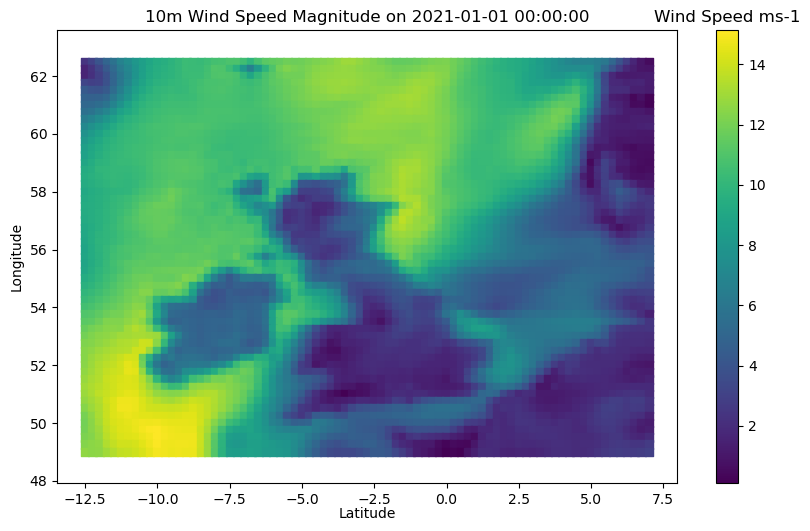

In [217]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
z = ax.scatter(store[:,1],store[:,0],c=store[:,2],marker='s')

cbar = fig.colorbar(z, ax=ax)
cbar.ax.set_title(f"Wind Speed ms{-1}")
ax.set_xlabel('Latitude', labelpad=0)
ax.set_ylabel('Longitude')
ax.axis('equal')
ax.set_title(f'10m Wind Speed Magnitude on {time}')

u10, 10 metre U wind component, m s**-1
v10, 10 metre V wind component, m s**-1


,latitude,longitude,wind_mag
0,62.5,-12.50,2.377043
1,62.5,-12.25,3.076439
2,62.5,-12.00,3.981824
3,62.5,-11.75,4.913342
4,62.5,-11.50,5.762983
...,...,...,...
4340,49.0,6.00,2.757671
4341,49.0,6.25,2.687213
4342,49.0,6.50,2.679518
4343,49.0,6.75,2.775965


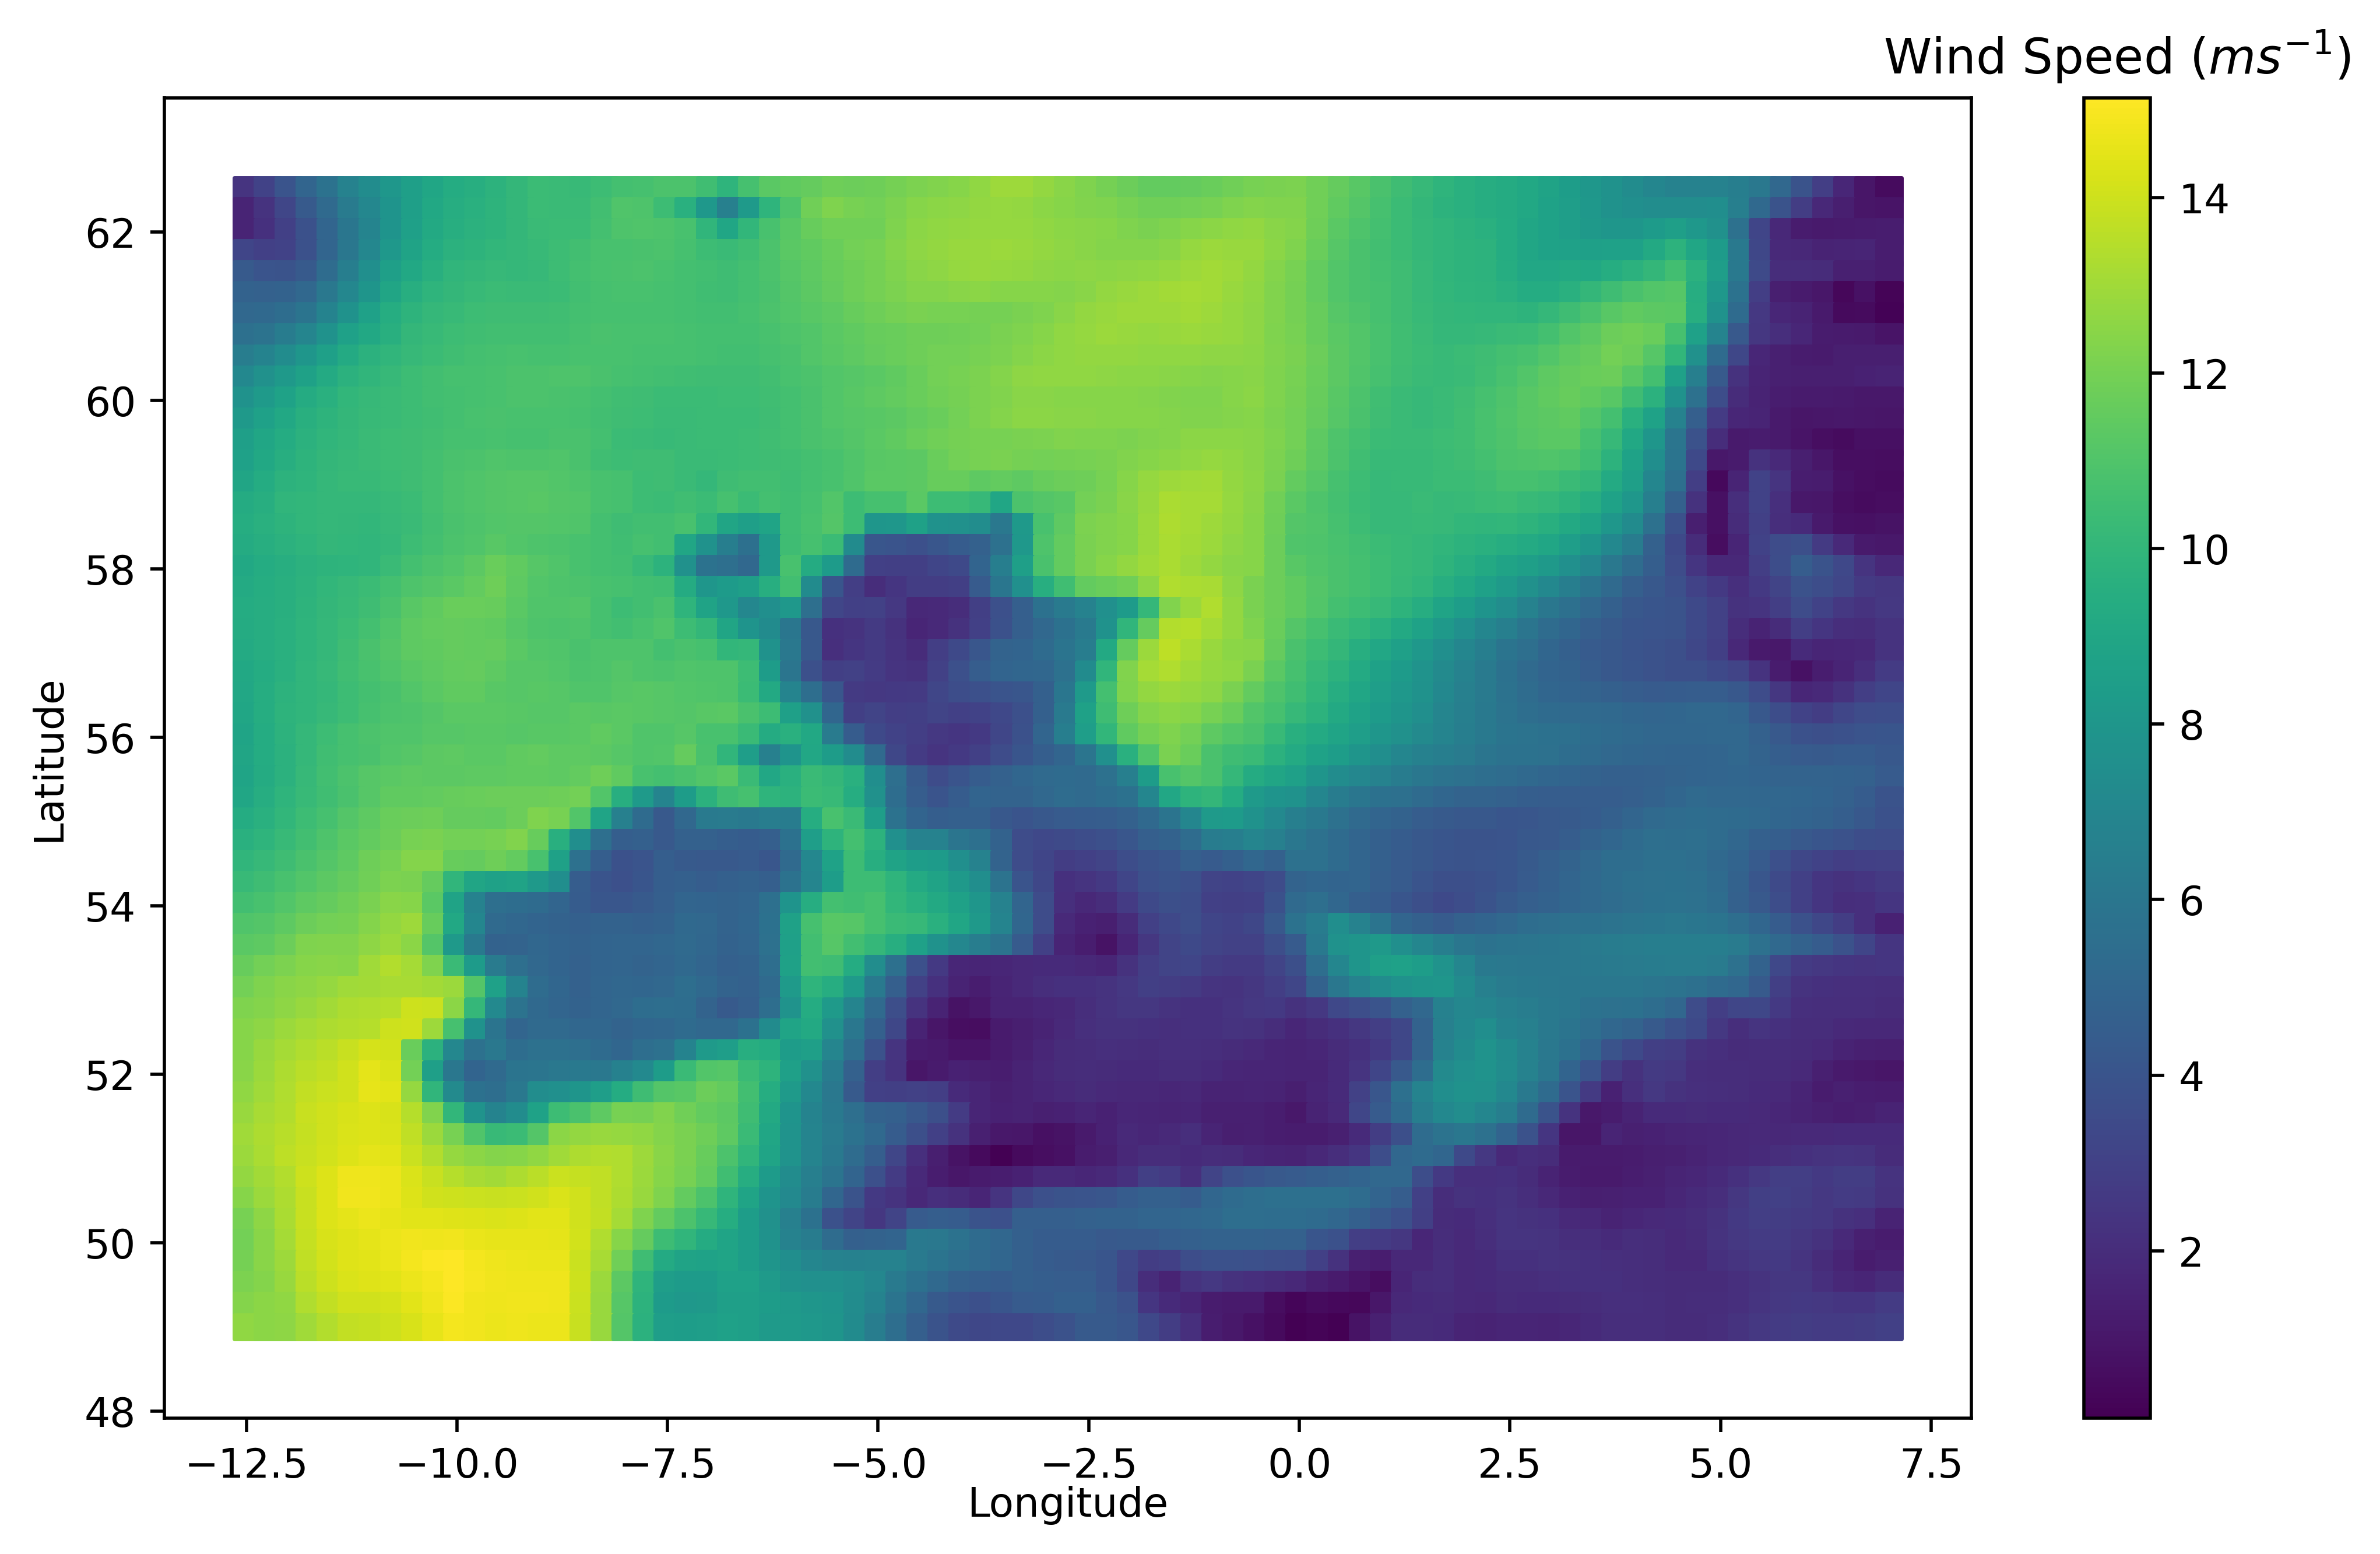

In [14]:
date_time = '2021-01-01 00:00:00' #set data and time wanted


ds = xr.open_dataset("sample_data/2021sample10m.grib", engine="cfgrib") #opening the dataset
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"])) #printing the keys
ds = ds.get(["u10", "v10"]) #selecting useful keys
df = ds.to_dataframe() #placing into pandas
df = df.drop(['number','step','surface','valid_time'],axis=1) #dropping useless columns
df = df.reset_index(level=['latitude', 'longitude']) #set long and lat from index -> column
df = df.reset_index(['time'])
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S') #formatting into date_time
df = df.loc[(df['time'] == date_time)] #filtering for speficic date
df['wind_mag'] = np.sqrt(df['u10']**2 + df['v10']**2) #creating wind mag column
df = df.drop(['u10','v10','time'],axis=1) #dropping individual wind values
display(df)
store = df.to_numpy()


#plotting wind speed magnitudes
fig, ax = plt.subplots(figsize=(10,6), dpi=500)
z = ax.scatter(store[:,1],store[:,0],c=store[:,2],marker='s')

cbar = fig.colorbar(z, ax=ax)
cbar.ax.set_title(r'Wind Speed $(ms^{-1}$)')
ax.set_xlabel('Longitude', labelpad=0)
ax.set_ylabel('Latitude')
ax.axis('equal')
#ax.set_title(f'10m Wind Speed Magnitude on {date_time}')


plt.savefig("10m Wind Plot UK.pdf", format="pdf", bbox_inches="tight")

u100, 100 metre U wind component, m s**-1
v100, 100 metre V wind component, m s**-1


,latitude,longitude,wind_mag
0,62.5,-12.50,2.388614
1,62.5,-12.25,3.164041
2,62.5,-12.00,4.164731
3,62.5,-11.75,5.176558
4,62.5,-11.50,6.080683
...,...,...,...
4340,49.0,6.00,5.101331
4341,49.0,6.25,4.945089
4342,49.0,6.50,4.932689
4343,49.0,6.75,5.051756


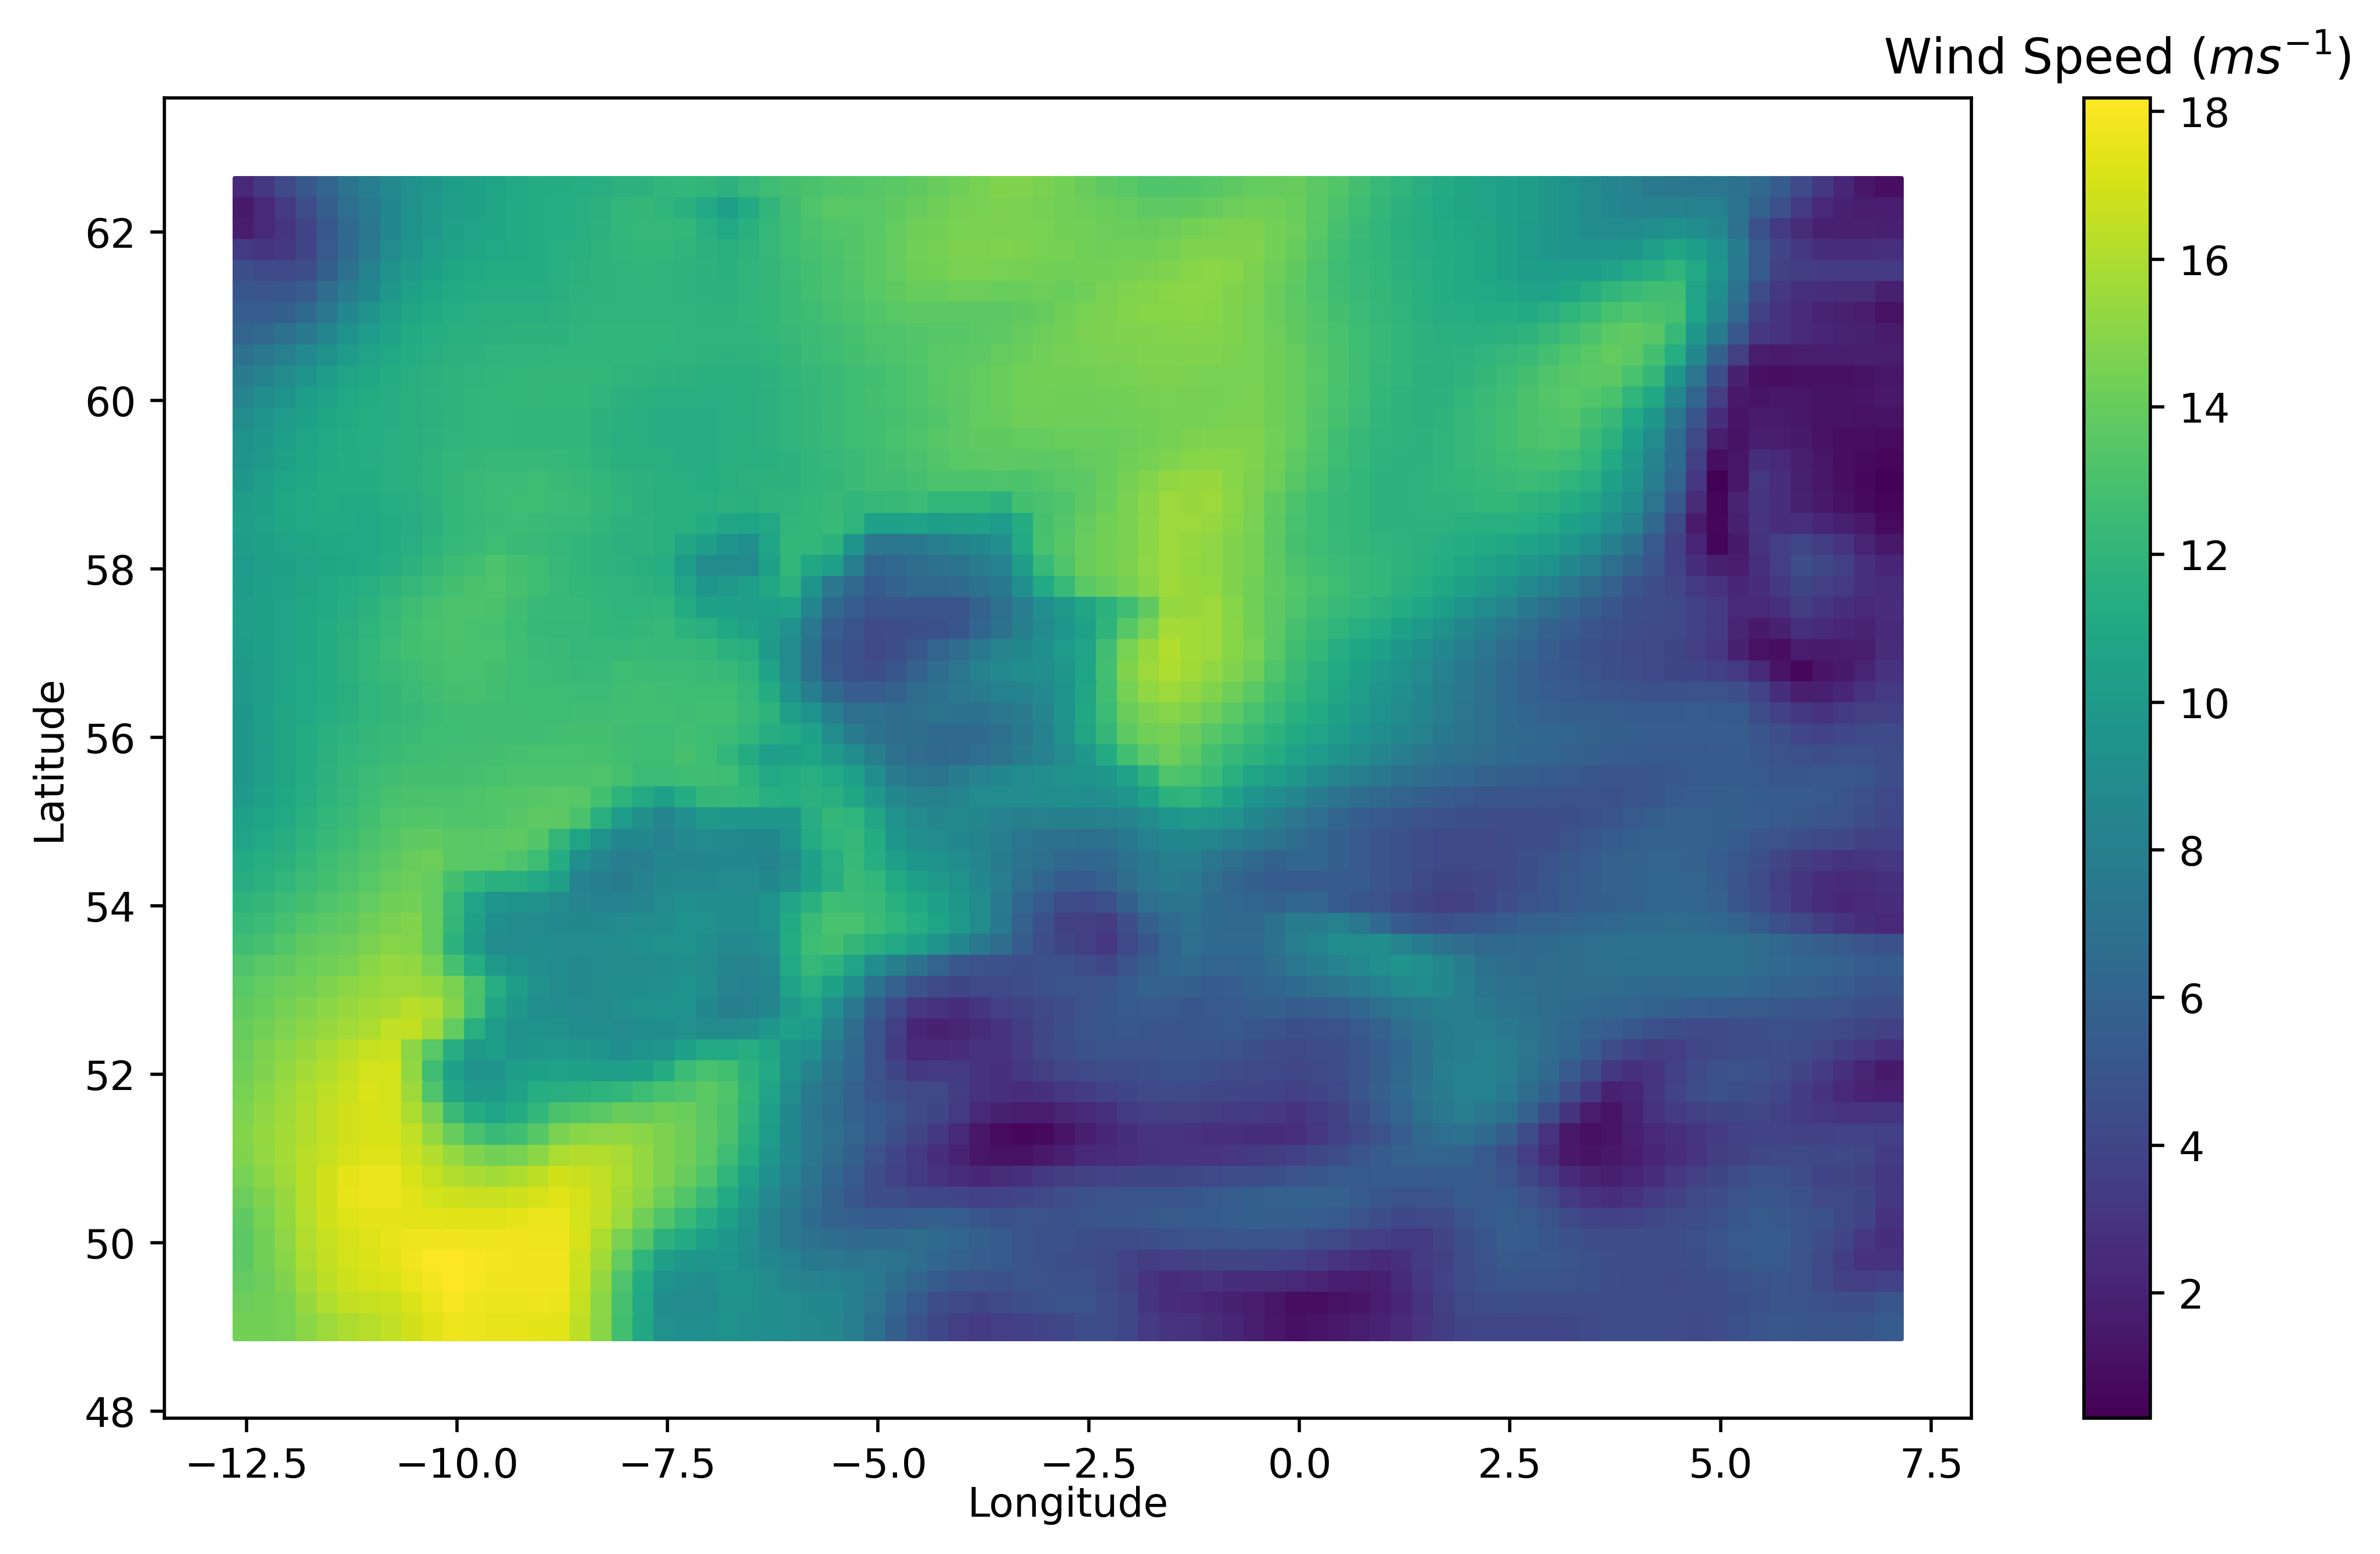

In [15]:
date_time = '2021-01-01 00:00:00' #set date and time wanted


ds = xr.open_dataset("sample_data/2021sample100m.grib", engine="cfgrib") #opening the dataset
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"])) #printing the keys
ds = ds.get(["u100", "v100"]) #selecting useful keys
df = ds.to_dataframe() #placing into pandas
df = df.drop(['number','step','surface','valid_time'],axis=1) #dropping useless columns
df = df.reset_index(level=['latitude', 'longitude']) #set long and lat from index -> column
df = df.reset_index(['time'])
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S') #formatting into date_time
df = df.loc[(df['time'] == date_time)] #filtering for speficic date
df['wind_mag'] = np.sqrt(df['u100']**2 + df['v100']**2) #creating wind mag column
df = df.drop(['u100','v100','time'],axis=1) #dropping individual wind values
display(df)
store = df.to_numpy()


#plotting wind speed magnitudes
fig, ax = plt.subplots(figsize=(10,6), dpi=500)
z = ax.scatter(store[:,1],store[:,0],c=store[:,2],marker='s')

cbar = fig.colorbar(z, ax=ax)
cbar.ax.set_title(r'Wind Speed $(ms^{-1}$)')
ax.set_xlabel('Longitude', labelpad=0)
ax.set_ylabel('Latitude')
ax.axis('equal')
#ax.set_title(f'100m Wind Speed Magnitude on {date_time}')

plt.savefig("100m Wind Plot UK.pdf", format="pdf", bbox_inches="tight")

## Frequency Distrubution

- Plot frequency distrubution for wind over a year
- at specific long at lat, with accuracy of 0.25

u10, 10 metre U wind component, m s**-1
v10, 10 metre V wind component, m s**-1


,wind_mag
2094,8.474852
6439,7.428675
10784,6.987025
15129,6.591871
19474,6.263916
...,...
6324069,5.957673
6328414,4.454031
6332759,4.658430
6337104,3.273737


Mean: 5.895243976556899
Sigma: 4.6045713737965865


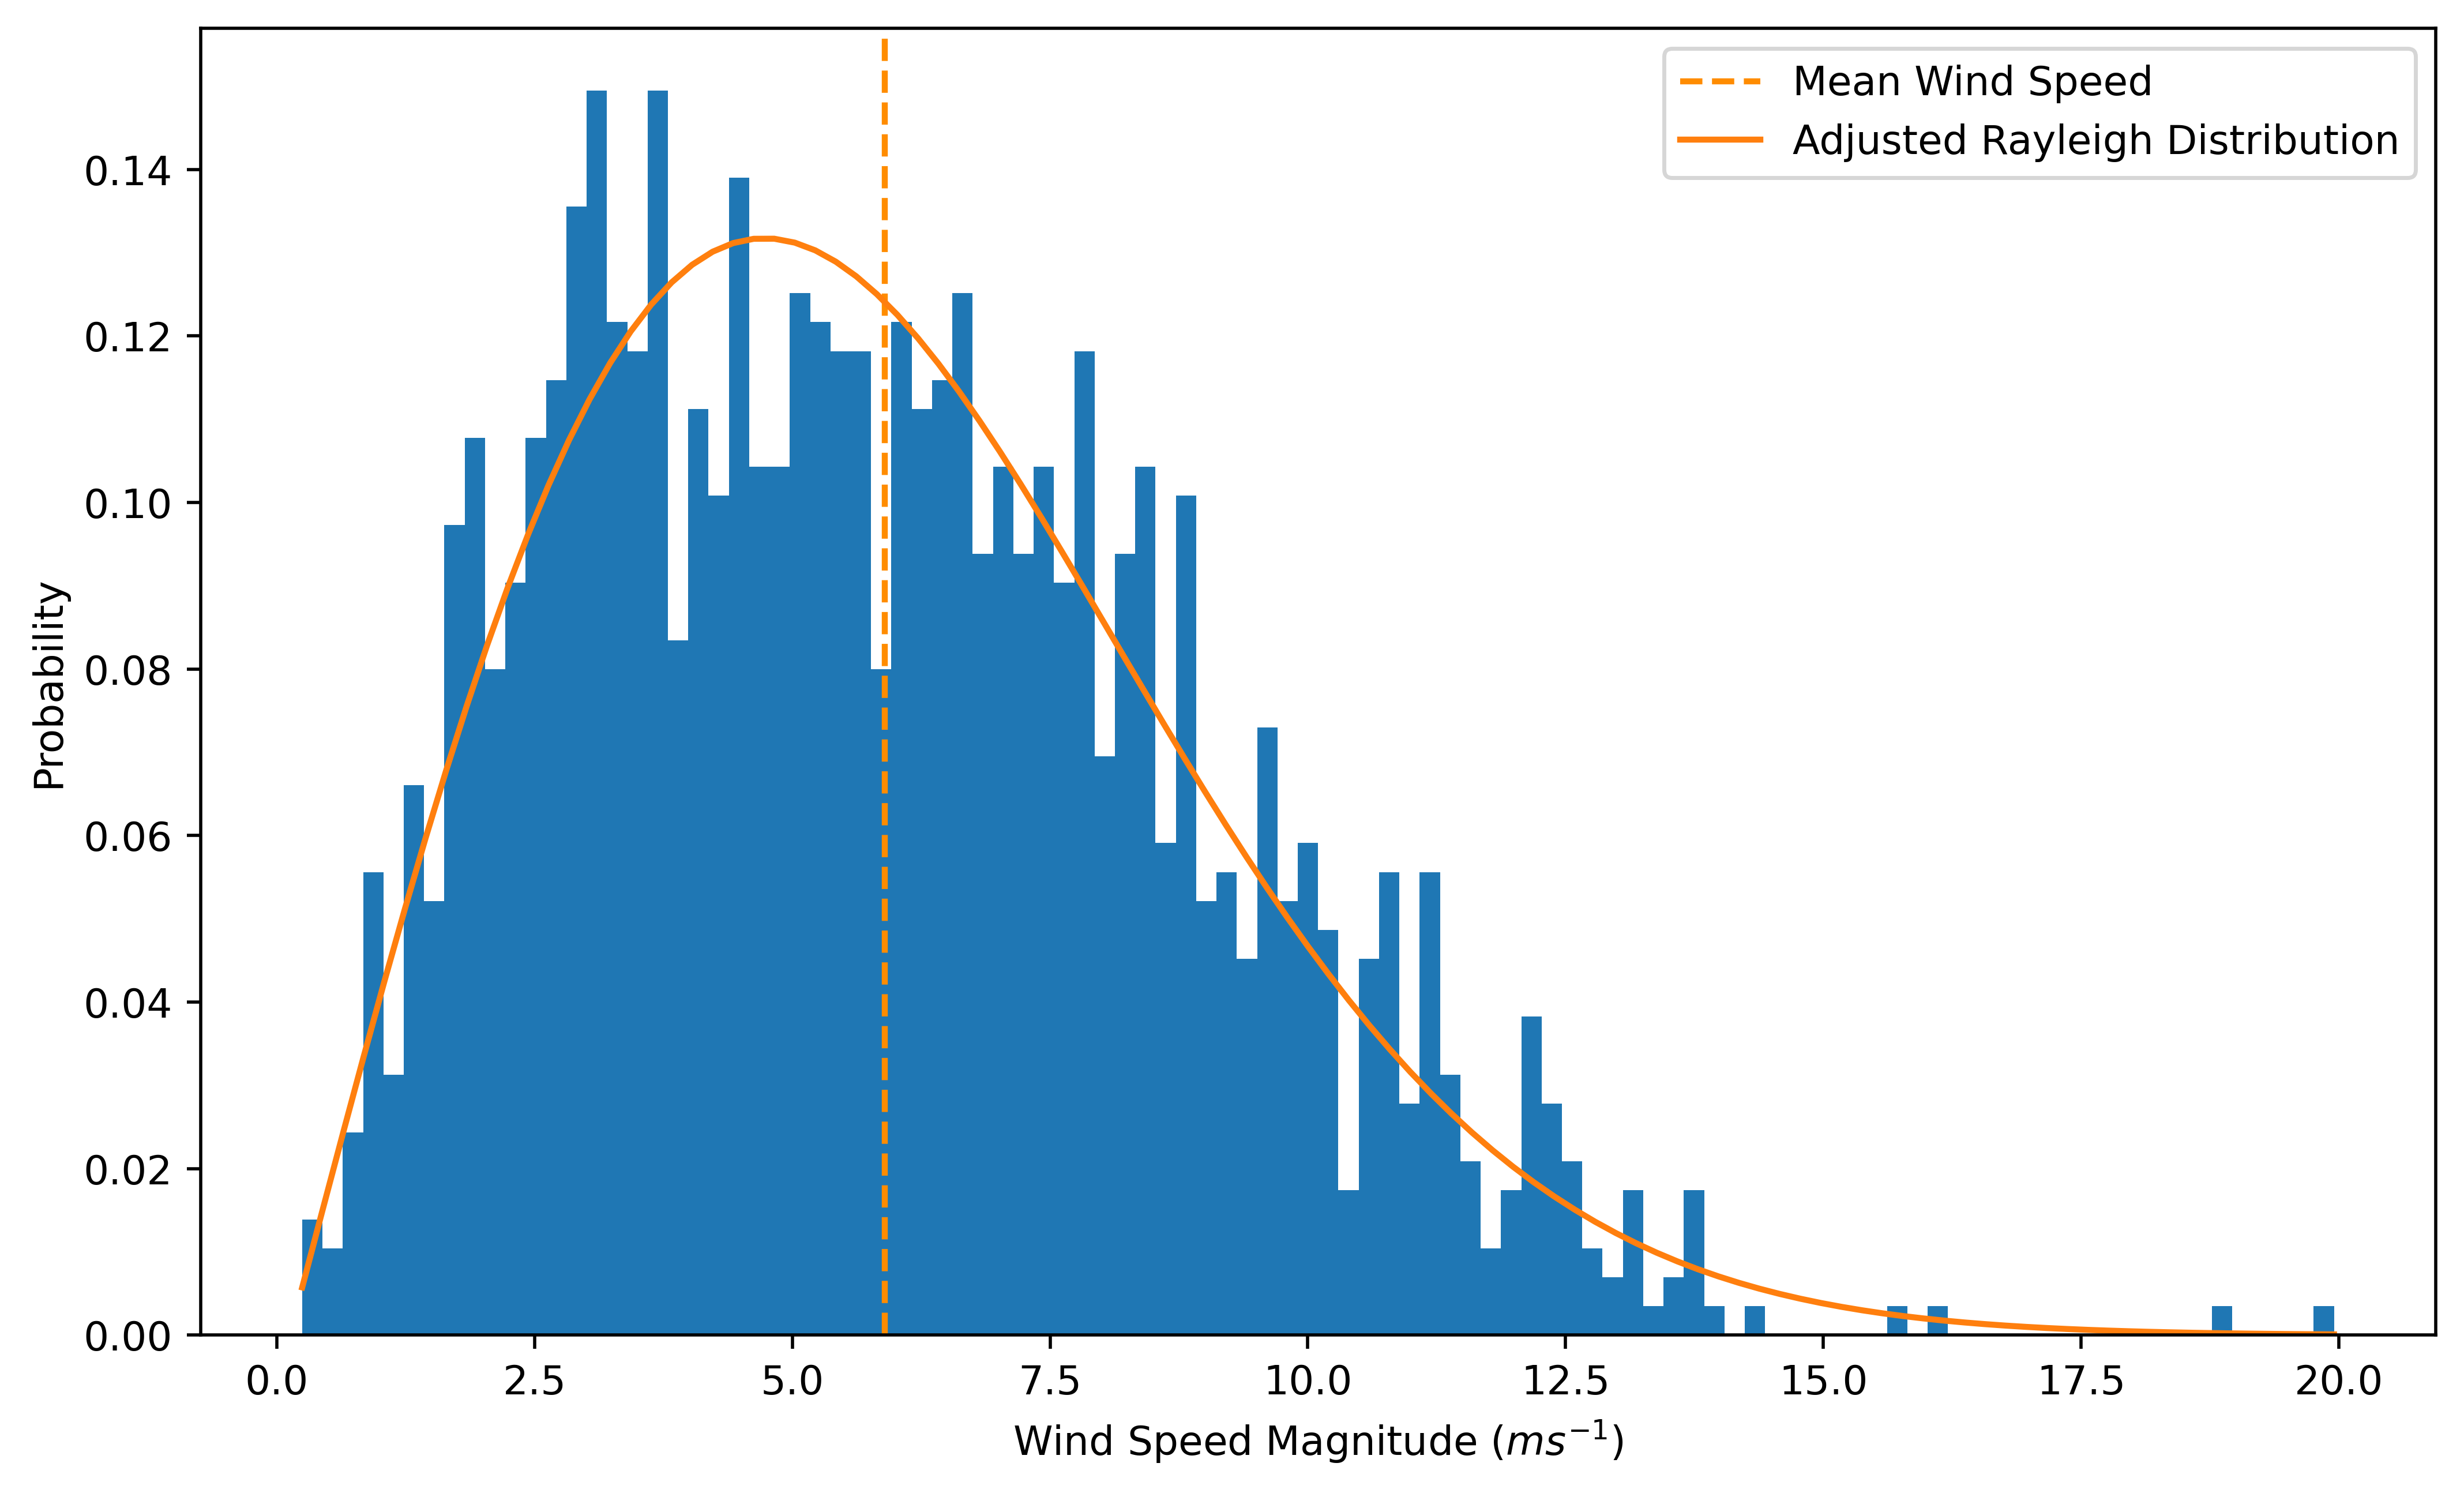

In [36]:
#set coordinates
longitude = np.round(-2.5, decimals =1)
latitude = 56
bins = 100

#opening dataset and formatting
ds = xr.open_dataset("sample_data/2021sample10m.grib", engine="cfgrib") #opening the dataset
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"])) #printing the keys
ds = ds.get(["u10", "v10"]) #selecting useful keys
df = ds.to_dataframe() #placing into pandas
df = df.drop(['number','step','surface','valid_time'],axis=1) #dropping useless columns
df = df.reset_index(level=['latitude', 'longitude']) #set long and lat from index -> column
df = df.reset_index(['time'])
df['wind_mag'] = np.sqrt(df['u10']**2 + df['v10']**2) #creating wind mag column
df = df.loc[(df['latitude'] == latitude)]
df = df.loc[(df['longitude'] == longitude)]
df = df.drop(['u10','v10','time','latitude', 'longitude'],axis=1) #dropping individual wind values
display(df)

store = df.to_numpy()

#rayleigh comparison
loc, scale = stats.rayleigh.fit(store)  # Adjust Distribution parameters with regards to dataset
xl = np.linspace(store.min(), store.max(), 100) # Tabulate over dataset range
mean = stats.rayleigh.stats(scale=scale, loc=loc,moments='m') #collecting mean
print('Mean:', mean)
print('Sigma:', scale)

#plotting histogram
plt.figure(figsize=(10,6), dpi=500)
plt.hist(store,bins=bins, density=True)
plt.axvline(mean, color='darkorange', linestyle='--', label='Mean Wind Speed')
#plt.title(f'Histogram of wind speed magnitudes at 10m over 2021 at {latitude}$\degree$ latitude and {longitude}$\degree$  longitude')
plt.xlabel(r'Wind Speed Magnitude $(ms^{-1}$)')
plt.ylabel('Probability')
plt.plot(xl, stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Adjusted Rayleigh Distribution")
plt.legend()

plt.savefig("10m Wind Speed Histogram (56N, -2.5E).pdf", format="pdf", bbox_inches="tight")

u100, 100 metre U wind component, m s**-1
v100, 100 metre V wind component, m s**-1


,wind_mag
2094,10.782969
6439,9.463123
10784,8.417024
15129,8.301314
19474,7.713112
...,...
6324069,9.078382
6328414,6.739453
6332759,7.081083
6337104,6.439655


Mean: 7.7790775917428725
Sigma: 6.275330305324546


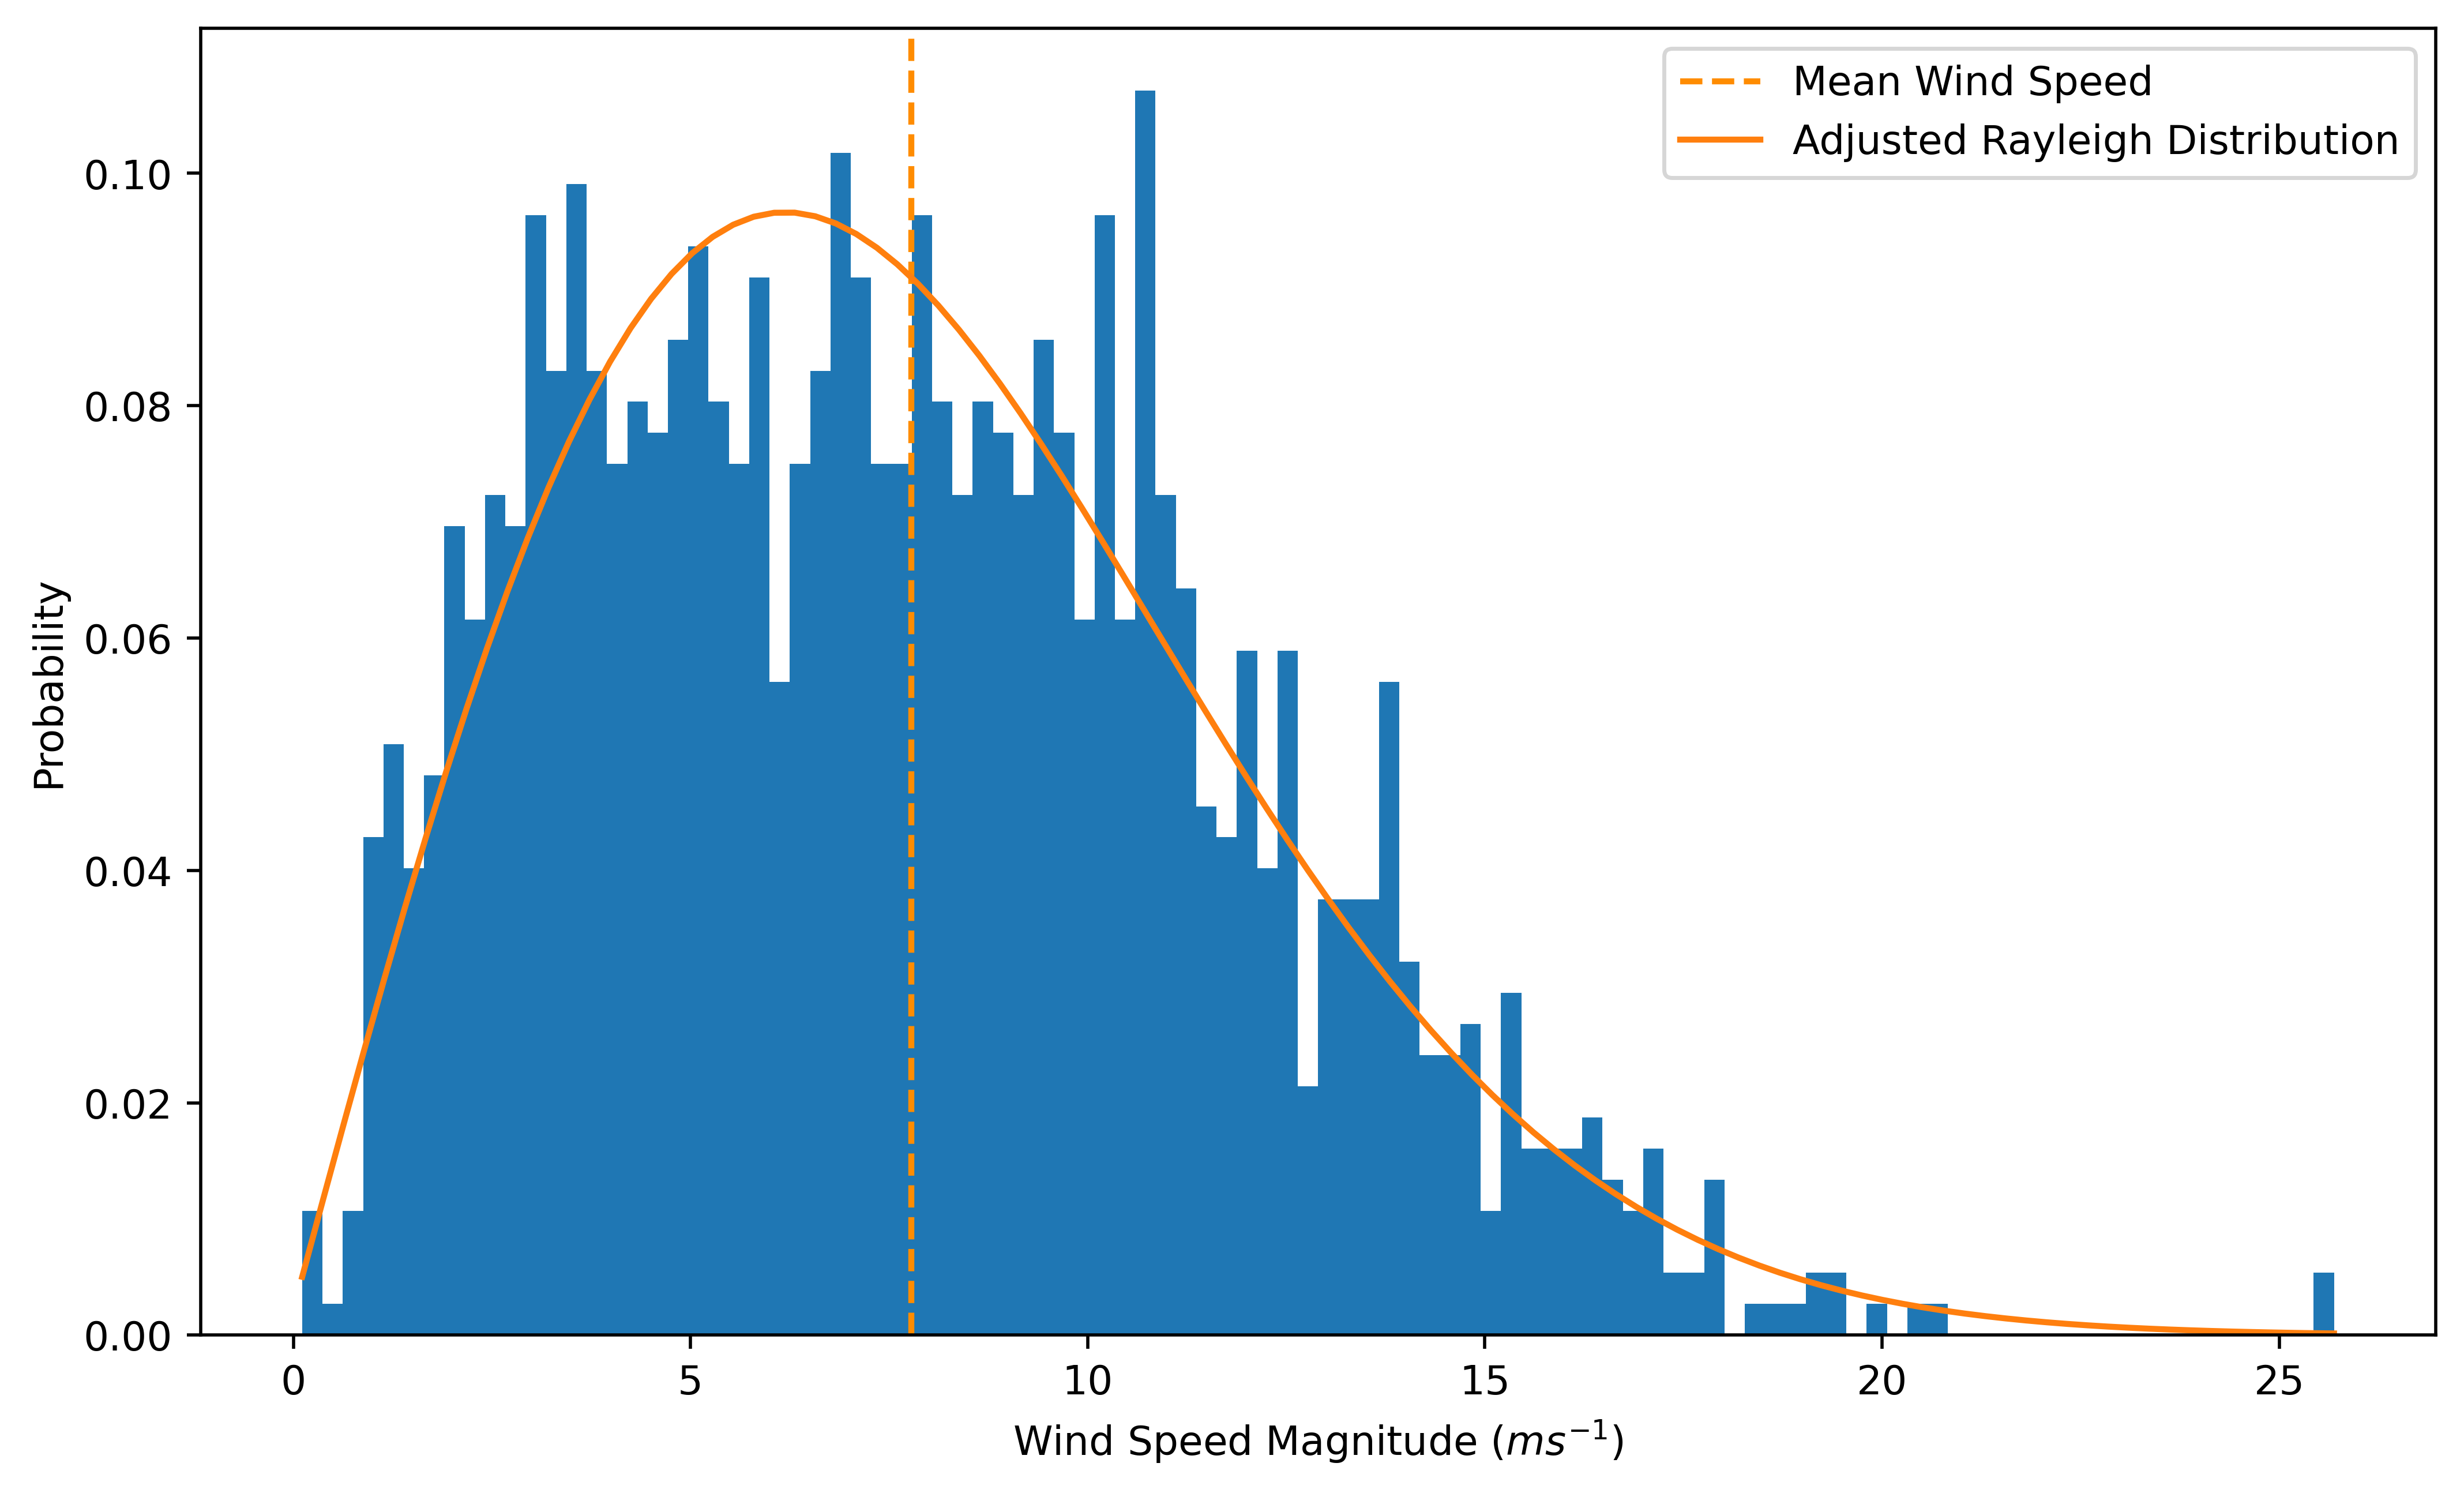

In [37]:
#set coordinates
longitude = np.round(-2.5, decimals =1)
latitude = 56
bins = 100

#opening dataset and formatting
ds = xr.open_dataset("sample_data/2021sample100m.grib", engine="cfgrib") #opening the dataset
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"])) #printing the keys
ds = ds.get(["u100", "v100"]) #selecting useful keys
df = ds.to_dataframe() #placing into pandas
df = df.drop(['number','step','surface','valid_time'],axis=1) #dropping useless columns
df = df.reset_index(level=['latitude', 'longitude']) #set long and lat from index -> column
df = df.reset_index(['time'])
df['wind_mag'] = np.sqrt(df['u100']**2 + df['v100']**2) #creating wind mag column
df = df.loc[(df['latitude'] == latitude)]
df = df.loc[(df['longitude'] == longitude)]
df = df.drop(['u100','v100','time','latitude', 'longitude'],axis=1) #dropping individual wind values
display(df)

store = df.to_numpy()

#rayleigh comparison
loc, scale = stats.rayleigh.fit(store)  # Adjust Distribution parameters with regards to dataset
xl = np.linspace(store.min(), store.max(), 100) # Tabulate over dataset range
mean = stats.rayleigh.stats(scale=scale, loc=loc,moments='m') #collecting mean
print('Mean:', mean)
print('Sigma:', scale)

#plotting histogram
plt.figure(figsize=(10,6), dpi=500)
plt.hist(store, bins=bins, density=True)
plt.axvline(mean, color='darkorange', linestyle='--', label='Mean Wind Speed')
#plt.title(f'Histogram of wind speed magnitudes at 100m over 2021 at {latitude}$\degree$ latitude and {longitude}$\degree$  longitude')
plt.xlabel(r'Wind Speed Magnitude $(ms^{-1}$)')
plt.ylabel('Probability')
plt.plot(xl, stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Adjusted Rayleigh Distribution")
plt.legend()

plt.savefig("100m Wind Speed Histogram (56N, -2.5E).pdf", format="pdf", bbox_inches="tight")